In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colaboratory/vgsales.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [3]:
df.head(100)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
95,96,Crash Bandicoot 2: Cortex Strikes Back,PS,1997.0,Platform,Sony Computer Entertainment,3.78,2.17,1.31,0.31,7.58
96,97,Super Mario Bros. 2,NES,1988.0,Platform,Nintendo,5.39,1.18,0.70,0.19,7.46
97,98,Super Smash Bros. for Wii U and 3DS,3DS,2014.0,Fighting,Nintendo,3.24,1.35,2.42,0.43,7.45
98,99,Call of Duty: World at War,X360,2008.0,Shooter,Activision,4.79,1.90,0.00,0.69,7.37


In [4]:
df.tail(100)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16498,16501,The Land Before Time: Into the Mysterious Beyond,GBA,2006.0,Platform,Game Factory,0.01,0.00,0.00,0.0,0.01
16499,16502,Irotoridori no Sekai: World's End Re-Birth,PSV,2015.0,Action,HuneX,0.00,0.00,0.01,0.0,0.01
16500,16503,Satomi Hakkenden: Hachi Tamanoki,PSP,2014.0,Adventure,Quinrose,0.00,0.00,0.01,0.0,0.01
16501,16504,"Transformers: War for Cybertron (XBox 360, PS3...",PC,2010.0,Shooter,Activision,0.01,0.00,0.00,0.0,0.01
16502,16505,Naraku no Shiro,PS2,2008.0,Adventure,Nippon Ichi Software,0.00,0.00,0.01,0.0,0.01
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.0,0.01


In [5]:
df.shape

(16598, 11)

In [6]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [7]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [8]:
df['Year'].median()

2007.0

In [9]:
df['Publisher'].mode()

0    Electronic Arts
dtype: object

In [10]:
dff = df.copy()

In [11]:
dff['Year'] = dff['Year'].fillna(dff['Year'].median())
dff['Publisher'] = dff['Publisher'].fillna(dff['Publisher'].mode()[0])

In [12]:
dff['Year'] = dff['Year'].astype('int')

In [13]:
dff.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [14]:
dff.dtypes

Rank              int64
Name             object
Platform         object
Year              int64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [15]:
dff.duplicated().sum()

0

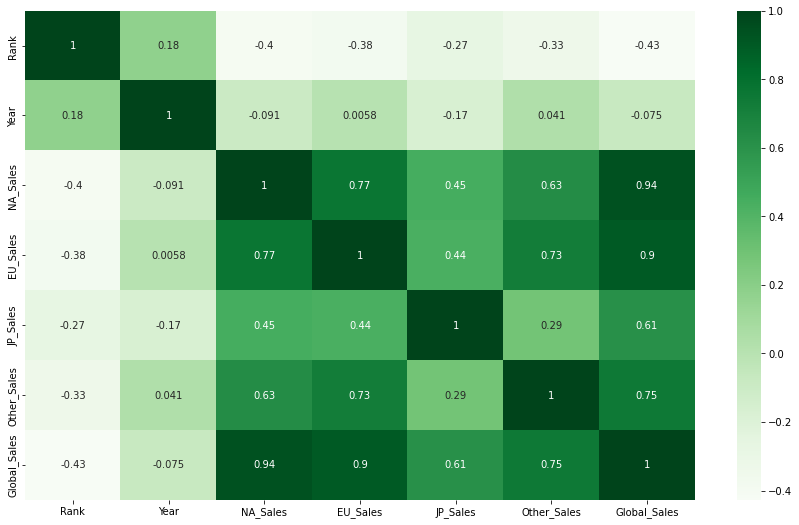

In [16]:
plt.figure(figsize = (15, 9))
sns.heatmap(dff.corr(), annot = True, cmap = 'Greens')

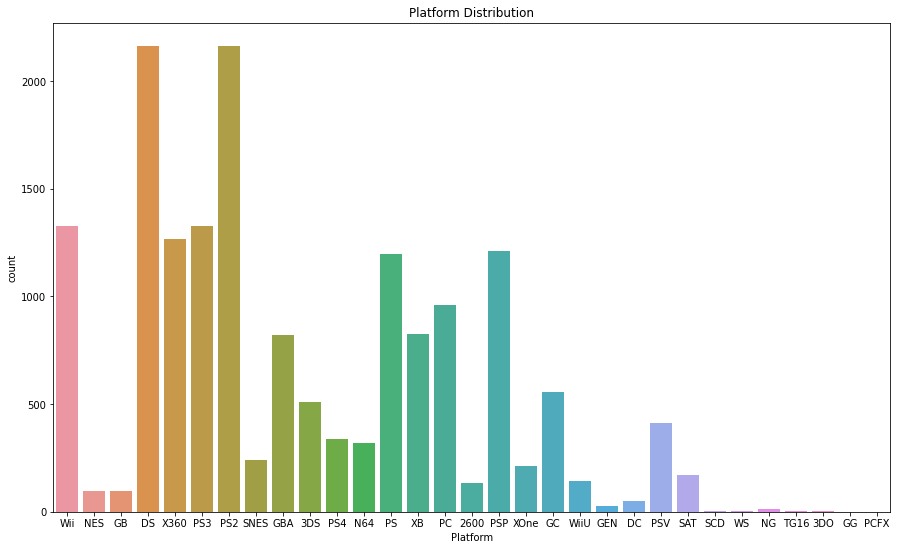

In [17]:
plt.figure(figsize = (15, 9))
plt.title("Platform Distribution")
sns.countplot(data = dff, x = 'Platform')

In [19]:
# plt.figure(figsize = (15, 9))
# plt.title("Genre Distribution")
# sns.countplot(data = df, x = 'Genre')

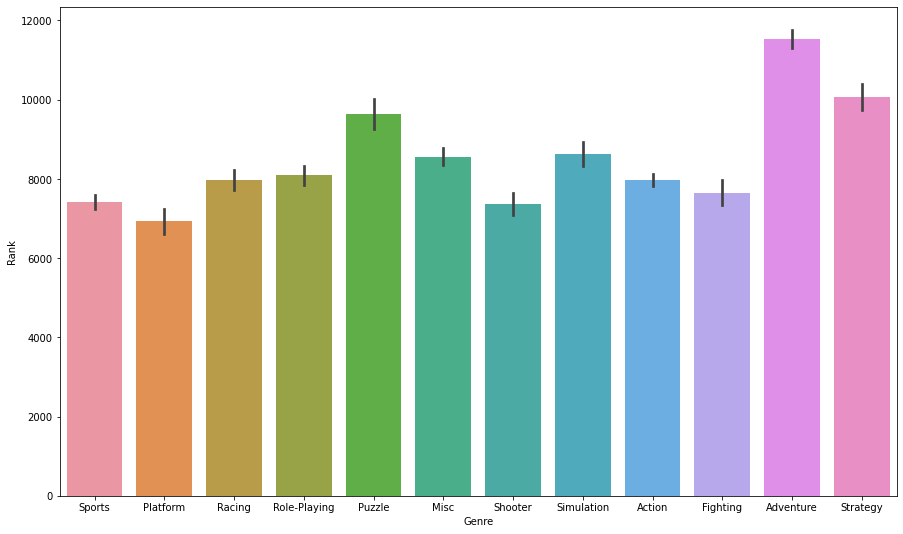

In [20]:
plt.figure(figsize = (15, 9))
sns.barplot(data = dff, x = 'Genre', y = 'Rank')

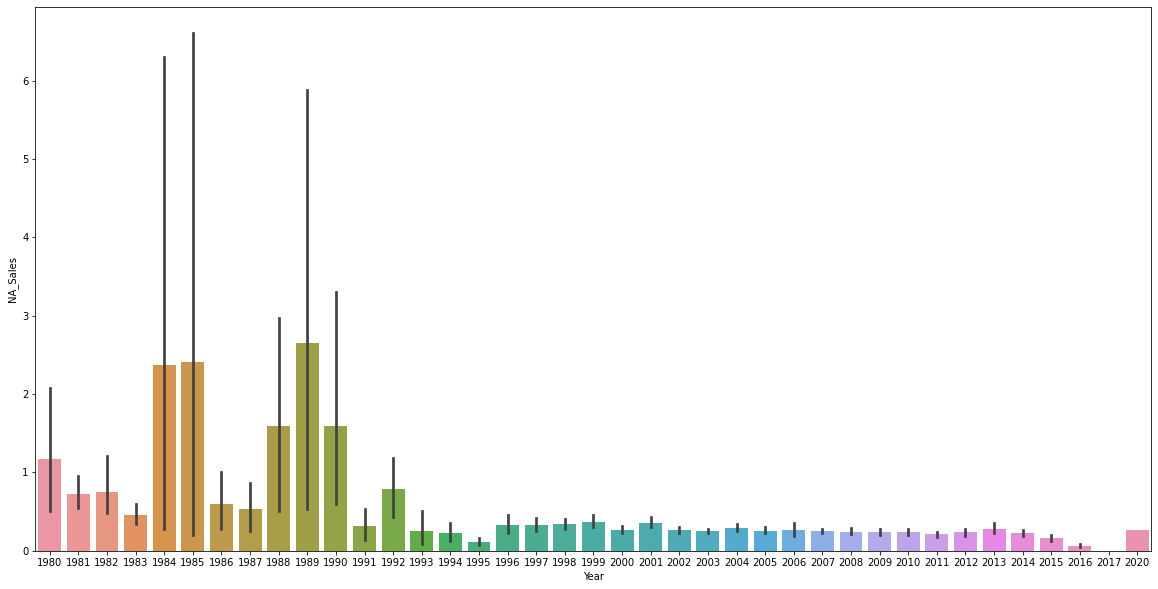

In [ ]:
plt.figure(figsize = (20, 10))
sns.barplot(data = dff, x = 'Year', y = 'NA_Sales')

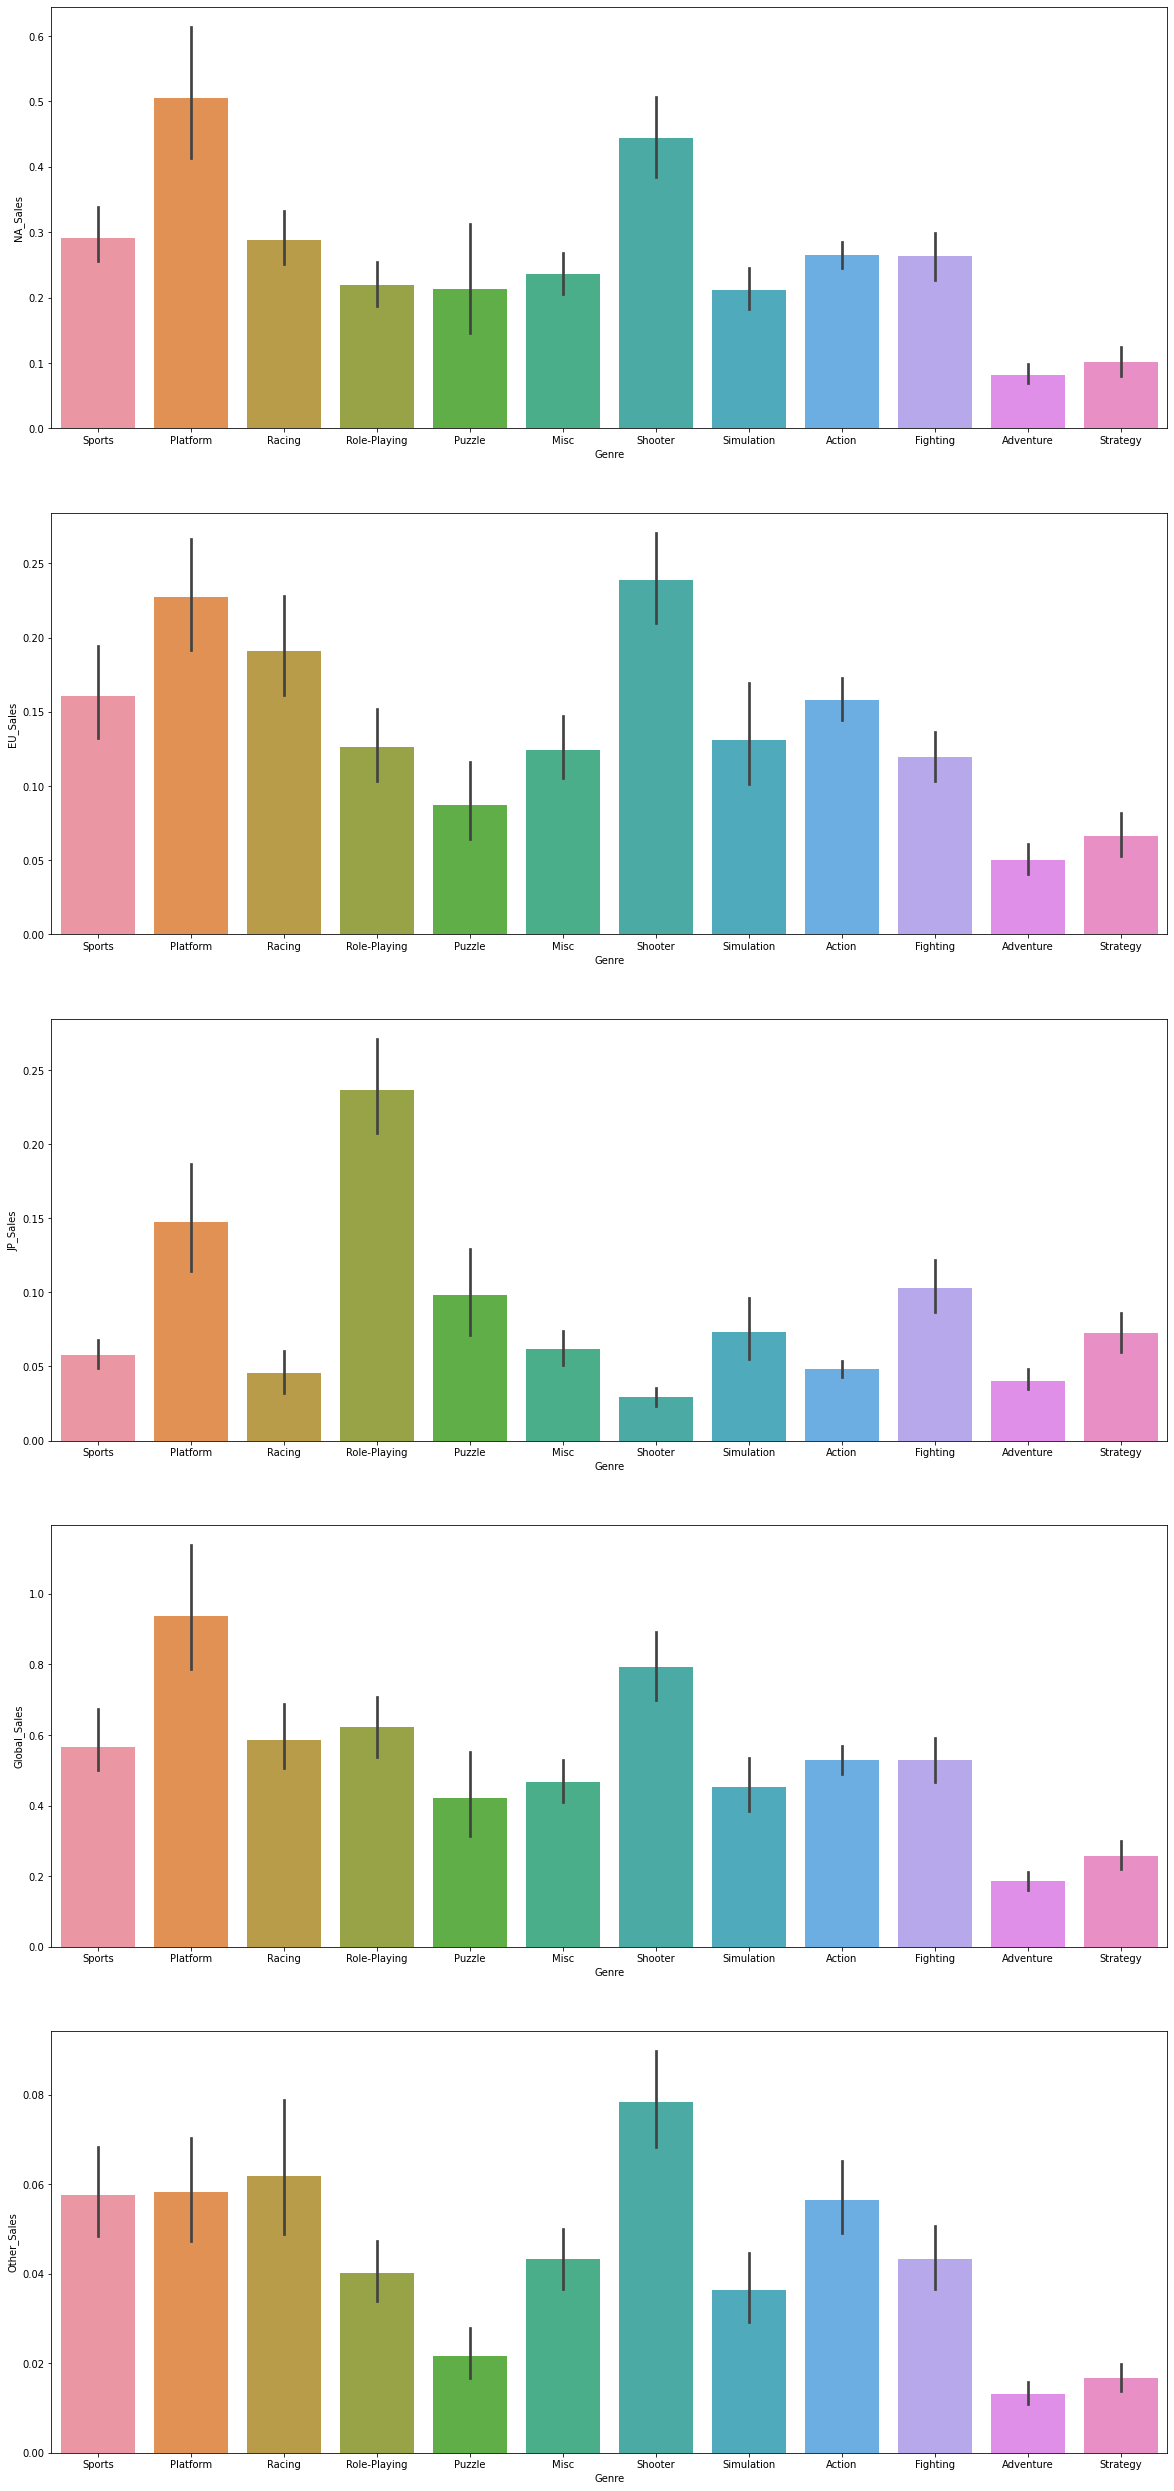

In [ ]:
sales = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales', 'Other_Sales']

f, ax = plt.subplots(5, 1, figsize = (20, 45))

for i, col in enumerate(sales):
  sns.barplot(data = dff, x = 'Genre', y = col, ax = ax[i])
  ax[i].set_xticklabels(ax[i].get_xticklabels())

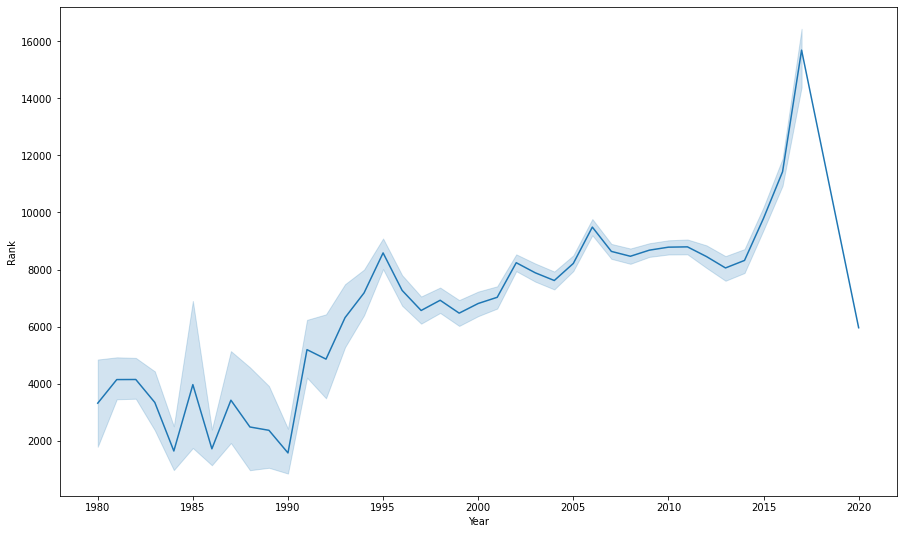

In [ ]:
plt.figure(figsize = (15, 9))
sns.lineplot(data = dff, x = 'Year', y = 'Rank')

In [ ]:
# game_sales1 = df[(df['Year'] >= 1980) & (df['Year'] <= 2000)]['Genre'].value_counts()

# game_sales1.head()

In [ ]:
# g_sales2 = df[(df['Year'] >= 2000)& (df['Year']<=2015)]['Genre']

# g_sales2.head()

In [ ]:
# plt.figure(figsize= (15, 9))

# sns.countplot(y = 'Genre', data = df, order = genre_sales2.index)

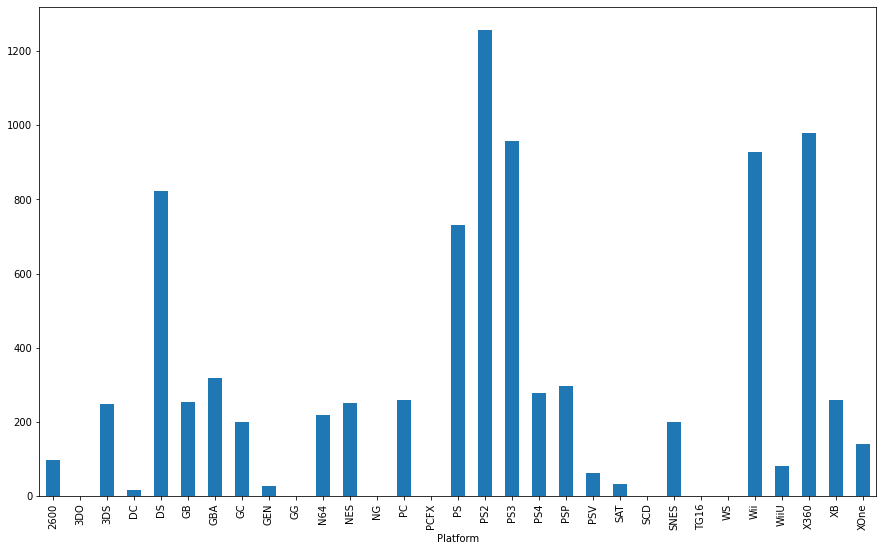

In [ ]:
plt.figure(figsize = (15, 9))
dff.groupby(['Platform'])['Global_Sales'].sum().plot.bar()

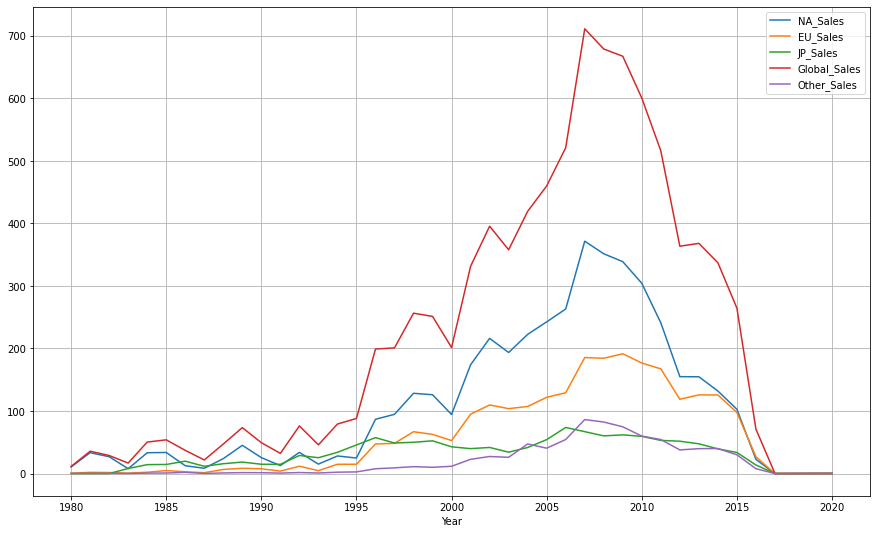

In [ ]:
# sales_per_year = fdf.groupby('Year')[['Global_Sales','NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()
sales_per_year = dff.groupby('Year')[sales].sum()
sales_per_year.plot(figsize = (15, 9))
plt.grid()


In [17]:
le = LabelEncoder()

encode = ['Platform', 'Genre']

for col in encode:
  dff[col] = le.fit_transform(dff[col])

In [22]:
dfff = dff.copy()

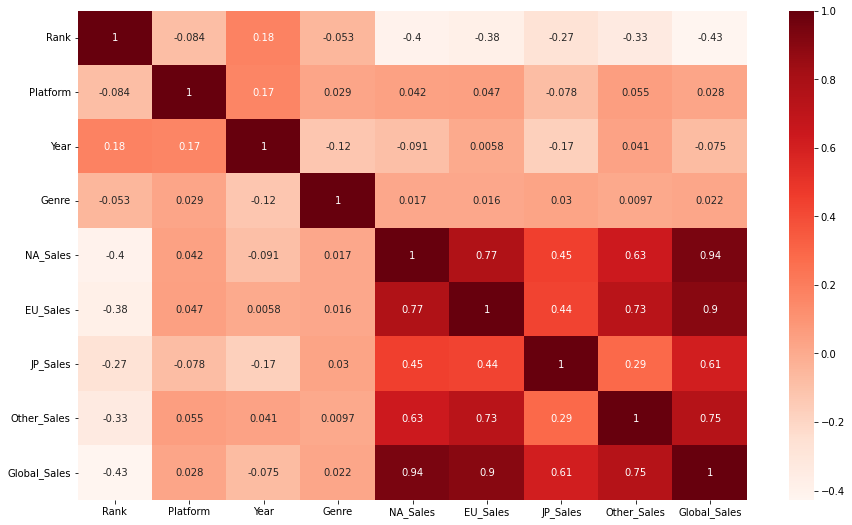

In [23]:
corr = dfff.corr()

plt.figure(figsize = (15, 9))
sns.heatmap(corr, annot = True, cmap = 'Reds')

In [24]:
X = dfff.drop(columns = ['Global_Sales', 'Name', 'Publisher'], axis = 1)
y = dfff['Global_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)
print('Shape of X_train', X_train.shape)
print('Shape of X_test', X_test.shape)
print('Shape of y_train', y_train.shape)
print('Shape of y_test', y_test.shape)

Shape of X_train (13278, 8)
Shape of X_test (3320, 8)
Shape of y_train (13278,)
Shape of y_test (3320,)


In [25]:
scale = StandardScaler()
X_train_scale = scale.fit_transform(X_train)
X_test_scale = scale.fit_transform(X_test)

In [26]:
rmse = []
mae = []
r2 = []
model_names = []

linreg = LinearRegression()
rg = Ridge()
forest = RandomForestRegressor()
gbreg = GradientBoostingRegressor()
nr = KNeighborsRegressor()

models = [linreg, rg, forest, gbreg, nr]

for model in models:
  model.fit(X_train_scale, y_train)
  y_pred = model.predict(X_test)
  rmse.append(round(np.sqrt(mean_squared_error(y_test, y_pred)), 2))
  mae.append(round(np.sqrt(mean_absolute_error(y_test, y_pred)), 2))
  r2.append(round(r2_score(y_test, y_pred), 2))

  print(f'model: {model} and rmse score is: {round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)}, mae score is: {round(np.sqrt(mean_absolute_error(y_test, y_pred)), 2)} r2_score is: {round(r2_score(y_test, y_pred), 2)}')

model_names = ['LinearRegression', 'Ridge', 'RandomForestRegressor', 'GradientBoostRegressor', 'KNeighborsRegressor']

result_df = pd.DataFrame({'RMSE': rmse, 'MAE': mae, 'R2_SCORE': r2}, index = model_names)
result_df

model: LinearRegression() and rmse score is: 4.19, mae score is: 1.91 r2_score is: -3.18
model: Ridge() and rmse score is: 3.94, mae score is: 1.85 r2_score is: -2.7
model: RandomForestRegressor() and rmse score is: 2.13, mae score is: 0.75 r2_score is: -0.07
model: GradientBoostingRegressor() and rmse score is: 2.12, mae score is: 0.75 r2_score is: -0.07
model: KNeighborsRegressor() and rmse score is: 2.08, mae score is: 0.75 r2_score is: -0.03


,RMSE,MAE,R2_SCORE
LinearRegression,4.19,1.91,-3.18
Ridge,3.94,1.85,-2.70
RandomForestRegressor,2.13,0.75,-0.07
GradientBoostRegressor,2.12,0.75,-0.07
KNeighborsRegressor,2.08,0.75,-0.03


In [27]:
model = {}
y_pred = {}

model['LinReg'] = LinearRegression()
model['Ridge'] = Ridge()
model['Forest'] = RandomForestRegressor()
model['GBReg'] = GradientBoostingRegressor()
model['NeighborsReg'] = KNeighborsRegressor ()

for m in model:
  model[m].fit(X_train_scale, y_train)
  y_pred[m] = model[m].predict(X_test_scale)

In [28]:
r2 = {}
mae = {}
mse = {}

for model in y_pred:
  r2[model] = r2_score(y_test, y_pred[model])
  mae[model] = mean_absolute_error(y_test, y_pred[model])
  mse[model] = mean_squared_error(y_test, y_pred[model])

  print('r2\n{}:'.format(model), r2[model])
  print('mae\n{}:'.format(model), mae[model])
  print("mse\n{}:".format(model), mse[model])


r2
LinReg: 0.9183979742399703
mae
LinReg: 0.15717516667883966
mse
LinReg: 0.3428398114333674
r2
Ridge: 0.9183835358603905
mae
Ridge: 0.1571765069208323
mse
Ridge: 0.34290047232121224
r2
Forest: 0.7479208283223313
mae
Forest: 0.04262557228915679
mse
Forest: 1.059076351099398
r2
GBReg: 0.7327830695927897
mae
GBReg: 0.04619485961797181
mse
GBReg: 1.1226755853098547
r2
NeighborsReg: 0.7246856057229346
mae
NeighborsReg: 0.13224096385542167
mse
NeighborsReg: 1.1566959783132529


In [29]:
forest = RandomForestRegressor()
forest.fit(X_train_scale, y_train)
forest.score(X_train_scale, y_train)


0.9993011198559332

In [ ]:
y_pred = forest.predict(X_test_scale)
r2 = r2_score(y_pred, y_test)
mae = mean_absolute_error(y_pred, y_test)
mse = mean_squared_error(y_pred, y_test)
print('r2_score:', r2)
print('mean_absolute_error:', mae)
print('mean_squared_error:', mse)

r2_score: 0.7706501153356026
mean_absolute_error: 0.10517015060240974
mean_squared_error: 1.5116180739367469
